In [74]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data=pd.read_csv('ads_data.csv')
data.head()

,date,time,event,platform,ad_id,client_union_id,campaign_union_id,ad_cost_type,ad_cost,has_video,target_audience_count
0,2019-04-01,2019-04-01 00:00:48,view,android,45061,34734,45061,CPM,200.6,0,1955269
1,2019-04-01,2019-04-01 00:00:48,view,web,121288,121288,121288,CPM,187.4,0,232011
2,2019-04-01,2019-04-01 00:01:03,view,android,102737,102535,102564,CPC,60.7,0,4410
3,2019-04-01,2019-04-01 00:01:03,view,android,107564,106914,107564,CPM,217.3,0,62711
4,2019-04-01,2019-04-01 00:01:09,view,android,4922,37,4400,CPC,60.1,0,1183501


In [3]:
ads_clients=pd.read_csv('ads_clients_data.csv')
ads_clients.head()

,date,client_union_id,community_id,create_date
0,2020-05-07,1,-130371893,2018-12-24
1,2020-05-07,2,-130304626,2019-02-10
2,2020-05-07,3,-130462599,2019-01-25
3,2020-05-07,4,-130574300,2018-12-09
4,2020-05-07,5,-130292358,2019-01-08


#### Посчитайте среднее количество разных рекламных событий(показы,клики) по обьявлениям. Ответ округлите до целых чисел

In [4]:
event_number=data.groupby(['ad_id','event'],as_index=False)\
.agg({'platform':'count'})\
.rename(columns={'platform':'event_count'})


In [5]:
event_number.head()

,ad_id,event,event_count
0,2,click,1
1,2,view,101
2,3,click,3
3,3,view,184
4,1902,click,1


In [9]:
event_number_pivot=event_number.pivot(index='ad_id',
                   columns='event',
                   values='event_count')\
                   .fillna(0)

In [10]:
event_number_pivot.mean().round(0)

event
click    113.0
view     923.0
dtype: float64

#### Визуализируйте распределение показов обьявлений: по оси х- число показов, по оси у- долю с такими показами

In [26]:
view_per_ads= event_number.query('event=="view"')
view_per_ads.head()

,ad_id,event,event_count
1,2,view,101
3,3,view,184
5,1902,view,41
6,2064,view,35
8,2132,view,58


<AxesSubplot:>

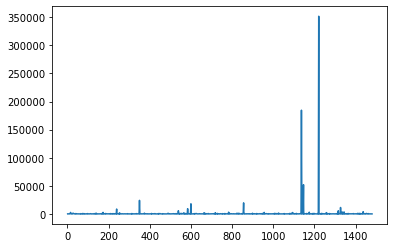

In [28]:
view_per_ads.event_count.plot()

In [29]:
view_per_ads.event_count.max()

351802

In [30]:
view_per_ads.event_count.idxmax()

1221

In [34]:
view_per_ads['log']=np.log(view_per_ads.event_count)

C:\Users\user\AppData\Local\Temp\ipykernel_16460\1086069086.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  view_per_ads['log']=np.log(view_per_ads.event_count)


C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='log', ylabel='Density'>

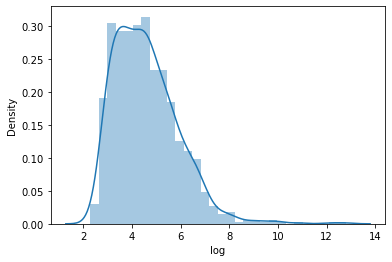

In [35]:
sns.distplot(view_per_ads['log'])

#### Посчитайте среднее число показов рекламы в каждый из дней, а затем скользящим средним по этим данным с окном=2

In [77]:
view_per_data=data.query('event=="view"')\
.pivot_table(index='ad_id',columns='date',values='platform',aggfunc='count')
view_per_data.head()

date,2019-04-01,2019-04-02,2019-04-03,2019-04-04,2019-04-05,2019-04-06
ad_id,,,,,,
2,83.0,18.0,NaN,NaN,NaN,NaN
3,158.0,26.0,NaN,NaN,NaN,NaN
1902,NaN,NaN,34.0,7.0,NaN,NaN
2064,NaN,28.0,7.0,NaN,NaN,NaN
2132,NaN,NaN,25.0,27.0,6.0,NaN


In [81]:
view_mean=view_per_data.mean()
view_mean

date
2019-04-01    154.482270
2019-04-02    137.786982
2019-04-03    163.952778
2019-04-04    675.901720
2019-04-05    919.109677
2019-04-06    277.122727
dtype: float64

In [79]:
rolling=view_mean.rolling(2).mean().round(0)

In [80]:
rolling['2019-04-06']

598.0

#### Нанести на один график значения среднего количества показов по дням и скользящего среднего на основе этих данных
#### Посчитайте в какой день наблюдается наибольшая разница между арифметическим средним и скользящим

<AxesSubplot:xlabel='date'>

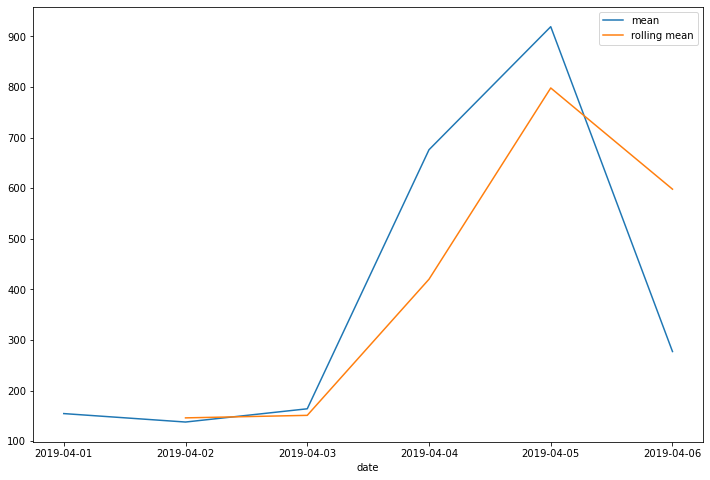

In [87]:
plt.figure(figsize=(12,8))
sns.lineplot(data=view_mean,label='mean')
sns.lineplot(data=rolling,label='rolling mean')

In [92]:
anomaly_date=(view_mean-rolling)\
             .abs()\
             .idxmax()

'2019-04-06'

#### Найти аномальное обьявление с наибольшим/наименьшим количеством показов в день, в который была замечена самая большая по модулю аномалия.Т.е. нужно найти среди данных рекламы в тот день обьявления с наибольшим или наименьшим числом показов. Потом напишите функцию , которая будет искать такое обьявление в датасете.

In [117]:
#Извлекаем  аномальную дату
anomaly_date=(view_mean-rolling)\
             .abs()\
             .idxmax()

In [118]:
difference_value=(view_mean-rolling)[anomaly_date]
difference_value

-320.8772727272727

In [122]:
#Ищем id рекламы с максимальным числом показов
if difference_value<=0:
    anomaly_ad=view_per_data[anomaly_date].idxmax()
else:
    anomaly_ad=view_per_data[anomaly_date].idxmin()
print(anomaly_ad)

112583


In [123]:
#Аномальное количество показов рекламы с id 112583 :
view_per_data['2019-04-06'].max()

48991.0

In [130]:
#Создадим функцию для поиска аномального обьявления
#Функция будет принимать пивот.тэйбл
def find_anomaly_id(data):
    view_mean=data.mean()
    view_rolling=view_mean.rolling(2).mean().round(0)
    
#Find anomaly day
    anomaly_date=(view_mean-view_rolling)\
             .abs()\
             .idxmax()
# Find id
    difference_value=(view_mean-view_rolling)[anomaly_date]
    if difference_value<=0:
        anomaly_ad=data[anomaly_date].idxmax()
    else:
        anomaly_ad=data[anomaly_date].idxmin()
    return anomaly_ad

In [131]:
#Проверяем функцию
find_anomaly_id(view_per_data)

112583

#### Объедините данные рекламы с данными о рекламных клиентах и найдите среднее количество дней от даты создания рекламного клиента (create_date) и первым запуском рекламного объявления этим клиентом (date).

In [6]:
df_merged=data.merge(ads_clients.drop(columns=['community_id','date']))
df_merged.head()

,date,time,event,platform,ad_id,client_union_id,campaign_union_id,ad_cost_type,ad_cost,has_video,target_audience_count,create_date
0,2019-04-01,2019-04-01 00:00:48,view,android,45061,34734,45061,CPM,200.6,0,1955269,2018-12-04
1,2019-04-01,2019-04-01 00:03:28,view,android,45061,34734,45061,CPM,200.6,0,1955269,2018-12-04
2,2019-04-01,2019-04-01 00:04:58,view,ios,45061,34734,45061,CPM,200.6,0,1955269,2018-12-04
3,2019-04-01,2019-04-01 00:10:23,view,ios,45061,34734,45061,CPM,200.6,0,1955269,2018-12-04
4,2019-04-01,2019-04-01 00:15:42,view,android,45061,34734,45061,CPM,200.6,0,1955269,2018-12-04


In [8]:
df_merged.dtypes

date                      object
time                      object
event                     object
platform                  object
ad_id                      int64
client_union_id            int64
campaign_union_id          int64
ad_cost_type              object
ad_cost                  float64
has_video                  int64
target_audience_count      int64
create_date               object
dtype: object

In [12]:
df_merged[['date','create_date']]=df_merged[['date','create_date']].apply(pd.to_datetime)
df_merged.dtypes

date                     datetime64[ns]
time                             object
event                            object
platform                         object
ad_id                             int64
client_union_id                   int64
campaign_union_id                 int64
ad_cost_type                     object
ad_cost                         float64
has_video                         int64
target_audience_count             int64
create_date              datetime64[ns]
dtype: object

In [18]:
df_merged.groupby('client_union_id')\
.apply(lambda x:(x.date-x.create_date).min())\
.mean()

Timedelta('124 days 09:04:43.532219570')

#### Вычислить конверсию из создания рекламного кабинета в запуск первой рекламы в течение не более 365 дней.

In [51]:
hold=pd.to_timedelta(365,unit='d')
hold

Timedelta('365 days 00:00:00')

In [68]:
creation_diff=df_merged.groupby('client_union_id')\
.apply(lambda x:(x.date-x.create_date).min())
creation_diff

client_union_id
1         98 days
9        114 days
13        66 days
16       105 days
20        32 days
           ...   
122004    67 days
122013   151 days
122023   126 days
122031    96 days
122078    71 days
Length: 838, dtype: timedelta64[ns]

In [57]:
pd.to_timedelta(hold)


Timedelta('365 days 00:00:00')

In [62]:
creation_diff=creation_diff.loc[creation_diff<=hold]
creation_diff         

client_union_id
1         98 days
9        114 days
13        66 days
16       105 days
20        32 days
           ...   
122004    67 days
122013   151 days
122023   126 days
122031    96 days
122078    71 days
Length: 838, dtype: timedelta64[ns]

In [67]:
conversion=round(creation_diff .shape[0]/ads_clients.client_union_id.nunique()*100,2)
conversion

0.69

#### Давайте разобъем наших клиентов по промежуткам от создания рекламного кабинета до запуска первого рекламного объявления.
Определите, сколько уникальных клиентов запустили свое первое объявление в первый месяц своего существования (от 0 до 30 дней). Список промежутков дней для метода pd.cut() – [0, 30, 90, 180, 365]. Создать временные промежутки можно с помощью pd.to_timedelta().

In [80]:
value = pd.to_timedelta([0, 30, 90, 180, 365], unit = 'd')
groups = pd.cut(creation_diff, bins = value,labels=['0-30d','30-90d','90-180d','180-365d']).value_counts()
groups
    

90-180d     396
30-90d      263
180-365d    168
0-30d        11
dtype: int64

#### Постройте интерактивный барплот, на котором будут показаны категории с количеством уникальных клиентов в них. Расположите их так, чтобы внизу была самая малочисленная, а наверху – самая большая.

<AxesSubplot:>

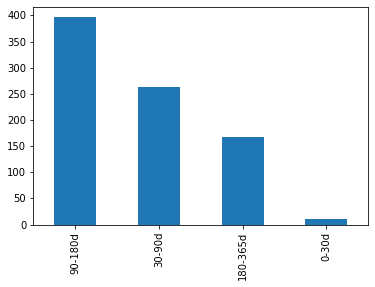

In [82]:
count.plot(kind="bar")